In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Random forrest - Analyzing satelite data
train_data = np.loadtxt("landsat_train.csv", delimiter=",")
val_data = np.loadtxt("landsat_validation.csv", delimiter=",")
X_area = np.loadtxt("landsat_area.csv", delimiter=",")


def load_data(data):
    x = data[:, 1:]
    y = data[:, 0]
    return x, y

x_train, y_train = load_data(train_data)
x_val, y_val = load_data(val_data)
print(f"Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {x_val.shape}, Testing labels shape: {y_val.shape}")

Training data shape: (5000000, 9), Training labels shape: (5000000,)
Testing data shape: (1335558, 9), Testing labels shape: (1335558,)


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# 2.1

pipe = Pipeline([
    ('scaler', StandardScaler()), 
    ('classifier', RandomForestClassifier(
        random_state=42,
        n_estimators = 10,
        max_depth=None,
        criterion='gini',
        bootstrap=True,
        max_features=None)),
])

pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_val)
acc = accuracy_score(y_val, y_pred)

print (f"Validation accuracy: {acc:.4f}")


Validation accuracy: 0.7514


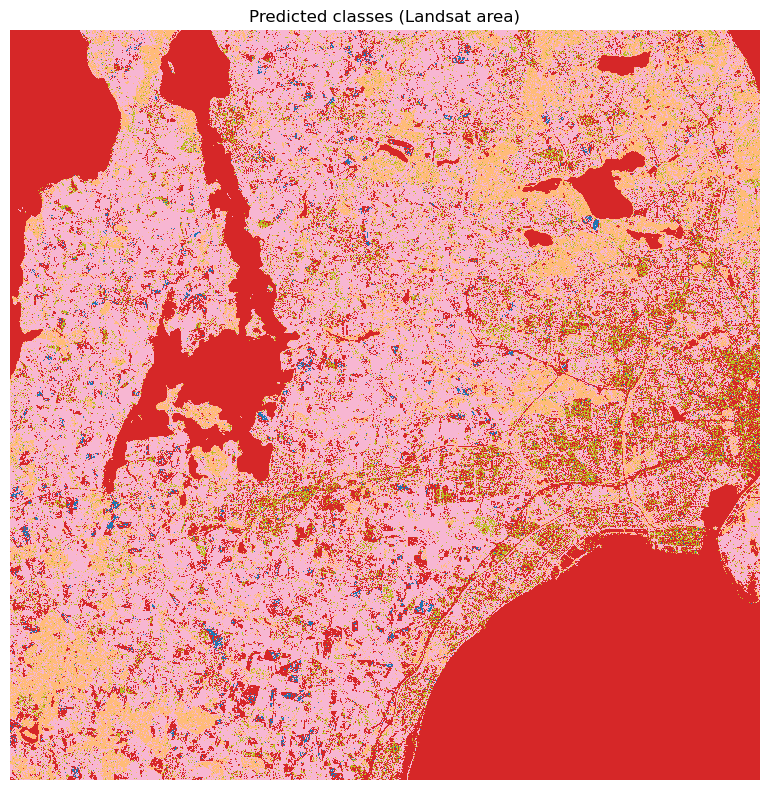

Billede gemt som: landsat_area_predictions.png


In [6]:
# 2.2

from matplotlib.colors import ListedColormap

y_area_pred = pipe.predict(X_area)

img_labels = y_area_pred.reshape(3000, 3000)

# Find alle klasser i forudsigelserne (sorteret for stabil mapping)
classes = np.unique(y_area_pred)

# Lav en farvepalette. Her bruger vi en ListedColormap fra matplotlib.
base_cmap = plt.get_cmap('tab20')
K = len(classes)
colors = base_cmap(np.linspace(0, 1, K))
cmap = ListedColormap(colors)

# Map vilkårlige labels -> 0..K-1 indeks til colormap
label_to_index = {label: i for i, label in enumerate(classes)}
index_img = np.vectorize(label_to_index.get, otypes=[int])(img_labels)

# --- 5) Plot & gem ---
plt.figure(figsize=(8, 8))
plt.imshow(index_img, cmap=cmap, interpolation='nearest')
plt.axis('off')
plt.title("Predicted classes (Landsat area)")
plt.tight_layout()
plt.savefig("landsat_area_predictions.png", dpi=200)
plt.show()

print("Billede gemt som: landsat_area_predictions.png")

In [ ]:
# --- Nearest Neighbor and Normalization ---
"""Nearest Neighbor classification is strongly affected by normalization. 
The method relies on distance calculations (often Euclidean).
If features are on very different scales (e.g. age in [0,100] vs. income in [0,100000]), the large-scale feature will dominate the distance metric.
By normalizing each feature to zero mean and unit variance, all features contribute more equally.
Therefore, nearest neighbor performance can change significantly with normalization.
"""

# --- Random Forest and Normalization ---
"""
Random Forest classification is not affected by normalization in the same way.
Decision trees split on thresholds of single features, e.g. "feature 3 > 5.2".
If the feature is rescaled (normalized), the threshold simply rescales accordingly,but the relative ordering of the data points remains unchanged.
Hence, the splits and the resulting model predictions are invariant to such scaling.
Therefore, normalization has no meaningful effect on Random Forest classifiers.
"""
